#**Ingest & EDA**

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive 

drive.mount('/content/gdrive')
boston=pd.read_csv('gdrive/My Drive/boston.csv') 
print(boston.shape)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(506, 14)


In [ ]:
boston.dropna()
print(boston.shape)

(506, 14)


In [ ]:
list(boston.columns.values)

['neighborhood',
 'crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rooms',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'lstat',
 'mv']

In [ ]:
boston.head()

NameError: ignored

In [ ]:
x=boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rooms', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']]
y=boston['mv']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size=0.3, random_state=42)

# **Model & Evaluate**

**1. Linear Regressor and Evaluation**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_predict1=lin_reg.predict(x_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from math import sqrt

scores1 = cross_val_score(lin_reg, x_train, y_train, cv=8,scoring='neg_mean_squared_error')
print(sqrt(mean(absolute(scores1))))

4.998435050875095


Feature: 0, Score: -0.13891
Feature: 1, Score: 0.03823
Feature: 2, Score: 0.03942
Feature: 3, Score: 3.43730
Feature: 4, Score: -15.65810
Feature: 5, Score: 3.88533
Feature: 6, Score: -0.00910
Feature: 7, Score: -1.42029
Feature: 8, Score: 0.21982
Feature: 9, Score: -0.00978
Feature: 10, Score: -0.84766
Feature: 11, Score: -0.58138


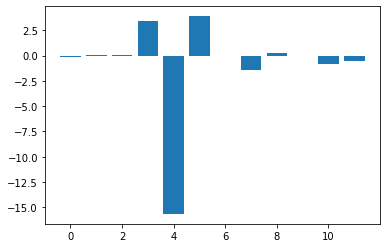

In [ ]:
from matplotlib import pyplot

importance1 = lin_reg.coef_
for i,v in enumerate(importance1):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance1))], importance1)
pyplot.show()

**2. Stochastic Gradient Descent Regressor and Evaluation**

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x_train, y_train)
y_predict2=sgd_reg.predict(x_test)

In [ ]:
scores2 = cross_val_score(sgd_reg, x_train, y_train, cv=8,scoring='neg_mean_squared_error')
print(sqrt(mean(absolute(scores2))))

862319534474307.8


Feature: 0, Score: 975123855118.10632
Feature: 1, Score: -3116163034769.74023
Feature: 2, Score: -2386207946891.21973
Feature: 3, Score: -786434233861.74548
Feature: 4, Score: -114635976550.69482
Feature: 5, Score: -1709210087127.92554
Feature: 6, Score: -2312972029176.96777
Feature: 7, Score: 1550179876800.26318
Feature: 8, Score: -1070894300843.23682
Feature: 9, Score: -2496368545538.45361
Feature: 10, Score: -1290417039274.63330
Feature: 11, Score: -35953983471.15944


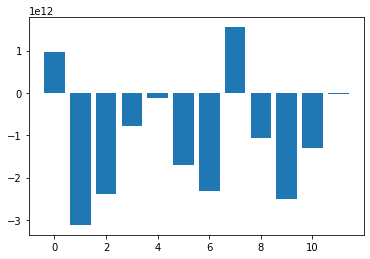

In [ ]:
importance2 = sgd_reg.coef_
for i,v in enumerate(importance2):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance2))], importance2)
pyplot.show()

**3. Ridge Regressor and Evaluation**



In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x_train, y_train)
y_predict3=ridge_reg.predict(x_test)

In [ ]:
scores3 = cross_val_score(ridge_reg, x_train, y_train, cv=8,scoring='neg_mean_squared_error')
print(sqrt(mean(absolute(scores3))))

5.015463649791794


Feature: 0, Score: -0.13392
Feature: 1, Score: 0.03939
Feature: 2, Score: 0.00723
Feature: 3, Score: 3.24077
Feature: 4, Score: -7.97444
Feature: 5, Score: 3.89192
Feature: 6, Score: -0.01559
Feature: 7, Score: -1.30422
Feature: 8, Score: 0.20201
Feature: 9, Score: -0.01048
Feature: 10, Score: -0.76246
Feature: 11, Score: -0.59837


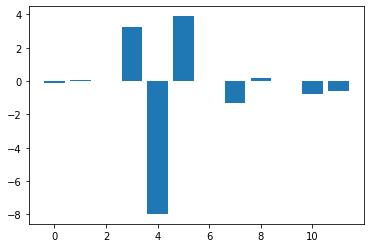

In [ ]:
importance3 = ridge_reg.coef_
for i,v in enumerate(importance3):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance3))], importance3)
pyplot.show()

**4. Lasso Regressor and Evaluation**

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)
y_predict4=lasso_reg.predict(x_test)

In [ ]:
scores4 = cross_val_score(lasso_reg, x_train, y_train, cv=8,scoring='neg_mean_squared_error')
print(sqrt(mean(absolute(scores4))))

5.083674925949758


Feature: 0, Score: -0.12842
Feature: 1, Score: 0.04111
Feature: 2, Score: -0.01242
Feature: 3, Score: 1.81667
Feature: 4, Score: -0.00000
Feature: 5, Score: 3.71525
Feature: 6, Score: -0.01802
Feature: 7, Score: -1.13593
Feature: 8, Score: 0.19189
Feature: 9, Score: -0.01171
Feature: 10, Score: -0.67687
Feature: 11, Score: -0.63838


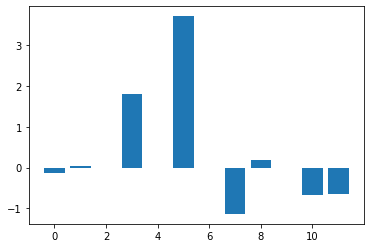

In [ ]:
importance4 = lasso_reg.coef_
for i,v in enumerate(importance4):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance4))], importance4)
pyplot.show()

**5. Elastic Net Regressor and Evaluation**

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_reg.fit(x_train, y_train)
y_predict5=elastic_net_reg.predict(x_test)

In [ ]:
scores5 = cross_val_score(elastic_net_reg, x_train, y_train, cv=8,scoring='neg_mean_squared_error')
print(sqrt(mean(absolute(scores5))))

5.084707053465774


Feature: 0, Score: -0.13202
Feature: 1, Score: 0.04332
Feature: 2, Score: -0.02065
Feature: 3, Score: 1.47438
Feature: 4, Score: -0.00000
Feature: 5, Score: 3.29142
Feature: 6, Score: -0.01517
Feature: 7, Score: -1.15764
Feature: 8, Score: 0.21062
Feature: 9, Score: -0.01223
Feature: 10, Score: -0.70410
Feature: 11, Score: -0.66781


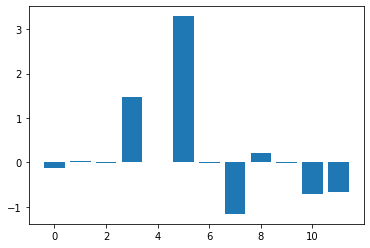

In [ ]:
importance5 = elastic_net_reg.coef_
for i,v in enumerate(importance5):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance5))], importance5)
pyplot.show()

**6. Random Forest Regressor and Evaluation**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_reg.fit(x_train, y_train)
y_predict6=rnd_reg.predict(x_test)

In [ ]:
scores6 = cross_val_score(rnd_reg, x_train, y_train, cv=8,scoring='neg_mean_squared_error')
print(sqrt(mean(absolute(scores6))))

3.7863671127200775


Feature: 0, Score: 0.02725
Feature: 1, Score: 0.00121
Feature: 2, Score: 0.00308
Feature: 3, Score: 0.00094
Feature: 4, Score: 0.01065
Feature: 5, Score: 0.43620
Feature: 6, Score: 0.00753
Feature: 7, Score: 0.05975
Feature: 8, Score: 0.00239
Feature: 9, Score: 0.00816
Feature: 10, Score: 0.01379
Feature: 11, Score: 0.42906


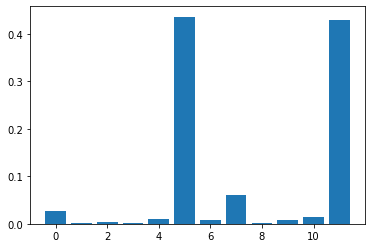

In [ ]:
importance6 = rnd_reg.feature_importances_
for i,v in enumerate(importance6):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance6))], importance6)
pyplot.show()

**7. Gradient Boosting Regressor and Evaluation**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt_reg = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt_reg.fit(x_train, y_train)
y_predict7=gbrt_reg.predict(x_test)

In [ ]:
scores7 = cross_val_score(gbrt_reg, x_train, y_train, cv=8,scoring='neg_mean_squared_error')
print(sqrt(mean(absolute(scores7))))

5.3959619085245


Feature: 0, Score: 0.03027
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.66712
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.07762
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.22499


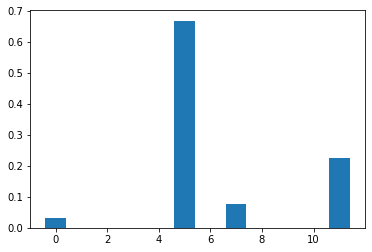

In [ ]:
importance7 = gbrt_reg.feature_importances_
for i,v in enumerate(importance7):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance7))], importance7)
pyplot.show()

**8. XGBoost Regressor and Evaluation**

In [ ]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(x_train, y_train)
y_predict8=xgb_reg.predict(x_test)

[21:02:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
scores8 = cross_val_score(xgb_reg, x_train, y_train, cv=8,scoring='neg_mean_squared_error')
print(sqrt(mean(absolute(scores8))))

[21:02:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:02:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:02:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:02:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:02:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:02:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:02:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:02:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Feature: 0, Score: 0.02227
Feature: 1, Score: 0.00261
Feature: 2, Score: 0.00991
Feature: 3, Score: 0.01836
Feature: 4, Score: 0.07449
Feature: 5, Score: 0.23127
Feature: 6, Score: 0.01464
Feature: 7, Score: 0.03546
Feature: 8, Score: 0.00996
Feature: 9, Score: 0.02303
Feature: 10, Score: 0.04948
Feature: 11, Score: 0.50854


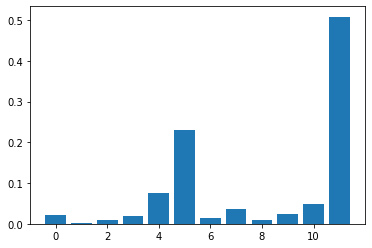

In [ ]:
importance8 = xgb_reg.feature_importances_
for i,v in enumerate(importance8):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance8))], importance8)
pyplot.show()

# **Exposition, Problem Description, and Management Recommendations**

We've built 8 regression models to predict the median value of homes in thousands of 1970 dollars, based on 12 home features. 


There are no missing values in this dataset, so we assume this is a cleaned dataset and we skip any data cleanning process.

We've also evaluated all 8 regression models with RMSE during cross-validation. Results are listed per below:

*   Linear Regressor: 4.998435050875095
*   Stochastic Gradient Descent Regressor: 862319534474307.8
*   Ridge Regressor: 5.015463649791794
*   Lasso Regressor: 5.083674925949758
*   Elastic Net Regressor: 5.084707053465774
*   Random Forest Regressor: 3.7863671127200775
*   Gradient Boosting Regressor: 5.3959619085245
*   XGBoost Regressor: 3.4168631439320674

The smaller value of RMSE, the better the models are. Thus, based on the above comparisons, my recommendation is to choose Random Forest Regressor or XGBoost Regressor for prediction purpose.

From bar plots of Random Forest Regressor Model and XGBoost Regressor Modle, it seems like feature 11 (lstat) and feature 5 (rooms) are the most important variables in predicting home prices. 